<h1 style="text-align: center; background-color:rgb(251, 219, 224)"><strong>Neural Networks Hyperparameters</strong></h1>

0. Importing libraries.

In [1]:
import tensorflow as tf
import keras

1. Firt of all I'll load the dataset and create variables for the training and testing images and lables.

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

2. Now since I don't know what the images look like I'll print the first 10

In [3]:
import matplotlib.pyplot as plt

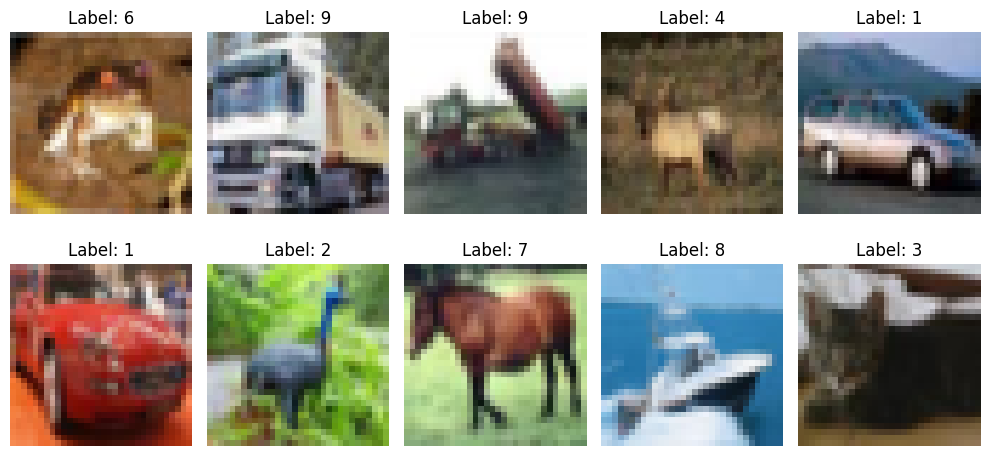

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.set_title(f'Label: {y_train[i][0]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

**CLASSES** <br>

0: airplane <br>
1: automobile <br>
2: bird <br>
3: cat <br>
4: deer <br>
5: dog <br>
6: frog <br>
7: horse <br>
8: ship <br>
9: truck <br>

3. Then I'll sclae the pixels so that the range is from 0 to 1.

In [5]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

4. There are 50000 labeled images in the training dataset and 10,000 in the testing dataset. Each of size 32 x 32 and colored that's why we have 3 instead of 1 (3=RGB).

In [6]:
print("X_train shape:", X_train.shape)
print("Training images", X_train.shape[0])
print("Testing images", X_test.shape[0])

X_train shape: (50000, 32, 32, 3)
Training images 50000
Testing images 10000


5. Then we hot encode the lables.

In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

6. Now I'll start by creating a simple CNN like the one on the https://keras.io/examples/vision/mnist_convnet/ website.

In [8]:
from keras import layers

In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

7. Now I'll train it.

In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

- Here we make it stop early before it overfits. This is so I can set a high epoch number.

In [11]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

early_stopping = EarlyStopping(monitor="val_loss",  patience=5, restore_best_weights=True)

In [12]:
batch_size = 128
epochs = 100  

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.2907 - loss: 1.9384 - val_accuracy: 0.4786 - val_loss: 1.4734
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.4829 - loss: 1.4390 - val_accuracy: 0.5618 - val_loss: 1.2896
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.5428 - loss: 1.3044 - val_accuracy: 0.5922 - val_loss: 1.1790
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.5735 - loss: 1.2239 - val_accuracy: 0.6144 - val_loss: 1.1260
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.5906 - loss: 1.1753 - val_accuracy: 0.6258 - val_loss: 1.0869
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.6107 - loss: 1.1248 - val_accuracy: 0.6526 - val_loss: 1.0376
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.6189 - loss: 1.0956 - val_accuracy: 0.6630 - val_loss: 0.9935
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.6328 - loss: 1

8. Printing the test accuracy and the loss.

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

Test Accuracy: 0.74
Test Loss: 0.76


9. Displaying the training vs testing accuracy.

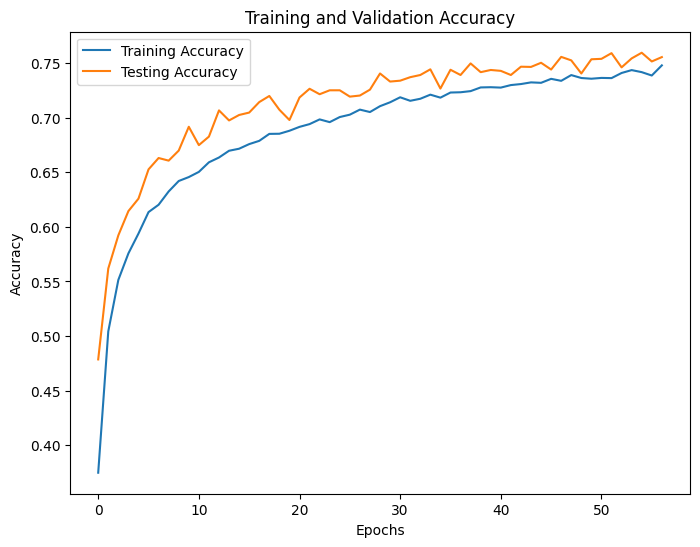

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

<center> <h3  style="background-color:rgb(240, 223, 255);"><strong>Preparing hyperparameters and functions</strong></h3></center>

- Since I don't want to have to copy and paste the model code I'll just create a function that will test each optimizer.

In [15]:
from keras.optimizers import SGD, RMSprop

- Storing the 3 different optimizers in a dictionary.

In [16]:
optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "RMSProp": RMSprop(learning_rate=0.001, rho=0.9),
    "Adam": Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
}

In [17]:
def create_model(optimizer):
    model = keras.Sequential([
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ])
    model.summary()
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model


- Creating a list theat will store the results of each optimizer.

In [18]:
results = {}

<center> <h3  style="background-color:#FFF4C0;"><strong>Trying out the SGD Optimizer</strong></h3></center>

In [19]:
learning_rate = [0.001, 0.01, 0.1]

In [20]:
sgd_accuracies = []

for lr in learning_rate:
    optimizer = SGD(learning_rate=lr)
    model = create_model(optimizer)
    early_stopping = EarlyStopping(monitor="val_loss",  patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_split=0.1, callbacks=[early_stopping], verbose=1)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    sgd_accuracies.append(test_accuracy)
    print(f"SGD (lr={lr}) - Accuracy: {test_accuracy:.4f}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.1045 - loss: 2.3131 - val_accuracy: 0.1352 - val_loss: 2.2905
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.1182 - loss: 2.2980 - val_accuracy: 0.1512 - val_loss: 2.2826
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.1319 - loss: 2.2887 - val_accuracy: 0.1660 - val_loss: 2.2746
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.1345 - loss: 2.2821 - val_accuracy: 0.1766 - val_loss: 2.2654
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.1484 - loss: 2.2713 - val_accuracy: 0.1994 - val_loss: 2.2545
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.1546 - loss: 2.2627 - val_accuracy: 0.2056 - val_loss: 2.2414
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.1720 - loss: 2.2474 - val_accuracy: 0.2196 - val_loss: 2.2249
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.1844 - loss: 2.2293 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1241 - loss: 2.2982 - val_accuracy: 0.2472 - val_loss: 2.1941
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2248 - loss: 2.1425 - val_accuracy: 0.2916 - val_loss: 1.9959
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2738 - loss: 2.0049 - val_accuracy: 0.3176 - val_loss: 1.9304
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3089 - loss: 1.9302 - val_accuracy: 0.3458 - val_loss: 1.8448
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3407 - loss: 1.8476 - val_accuracy: 0.3806 - val_loss: 1.7462
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3780 - loss: 1.7556 - val_accuracy: 0.4060 - val_loss: 1.6729
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4033 - loss: 1.6905 - val_accuracy: 0.4224 - val_loss: 1.6152
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4111 - loss: 1.6485 - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.2050 - loss: 2.1518 - val_accuracy: 0.3302 - val_loss: 1.8517
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.4096 - loss: 1.6711 - val_accuracy: 0.5048 - val_loss: 1.4102
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.4856 - loss: 1.4642 - val_accuracy: 0.5454 - val_loss: 1.3022
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5229 - loss: 1.3464 - val_accuracy: 0.5630 - val_loss: 1.2554
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.5564 - loss: 1.2717 - val_accuracy: 0.6034 - val_loss: 1.1538
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.5699 - loss: 1.2187 - val_accuracy: 0.5710 - val_loss: 1.2109
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.5900 - loss: 1.1710 - val_accuracy: 0.6350 - val_loss: 1.0740
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.6075 - loss: 1.

In [21]:
results['SGD'] = sgd_accuracies

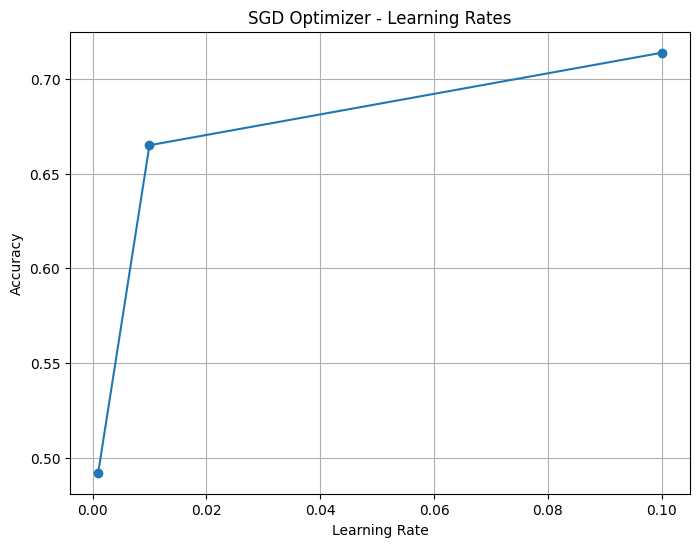

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(learning_rate, sgd_accuracies, marker='o')
plt.title("SGD Optimizer - Learning Rates")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

<center> <h3  style="background-color:rgb(216, 250, 210);"><strong>Trying out the RMSProp Optimizer</strong></h3></center>

In [23]:
rhos = [0.8, 0.9, 0.95]

In [24]:
rmsprop_accuracies = []

for rho in rhos:
    optimizer = RMSprop(learning_rate=0.001, rho=rho)
    model = create_model(optimizer)
    early_stopping = EarlyStopping(monitor="val_loss",  patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_split=0.1, callbacks=[early_stopping], verbose=1)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    rmsprop_accuracies.append(test_accuracy)
    print(f"RMSProp (rho={rho}) - Accuracy: {test_accuracy:.4f}")

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.2728 - loss: 1.9907 - val_accuracy: 0.4112 - val_loss: 1.6693
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.4449 - loss: 1.5551 - val_accuracy: 0.5226 - val_loss: 1.3765
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.5005 - loss: 1.4216 - val_accuracy: 0.5246 - val_loss: 1.3665
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.5387 - loss: 1.3232 - val_accuracy: 0.5896 - val_loss: 1.1961
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.5610 - loss: 1.2599 - val_accuracy: 0.6050 - val_loss: 1.1464
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.5821 - loss: 1.2075 - val_accuracy: 0.6346 - val_loss: 1.0765
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6035 - loss: 1.1596 - val_accuracy: 0.6352 - val_loss: 1.0758
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.6095 - loss: 1.1

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2729 - loss: 1.9869 - val_accuracy: 0.4612 - val_loss: 1.5305
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4518 - loss: 1.5388 - val_accuracy: 0.5384 - val_loss: 1.3493
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5050 - loss: 1.4032 - val_accuracy: 0.5610 - val_loss: 1.2633
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5397 - loss: 1.3161 - val_accuracy: 0.5756 - val_loss: 1.2602
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5604 - loss: 1.2528 - val_accuracy: 0.6112 - val_loss: 1.1552
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5852 - loss: 1.1985 - val_accuracy: 0.5906 - val_loss: 1.2053
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5992 - loss: 1.1534 - val_accuracy: 0.6284 - val_loss: 1.0916
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6111 - loss: 1.1250 - 

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2743 - loss: 1.9848 - val_accuracy: 0.4182 - val_loss: 1.6365
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4566 - loss: 1.5401 - val_accuracy: 0.5140 - val_loss: 1.3781
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5139 - loss: 1.3901 - val_accuracy: 0.5140 - val_loss: 1.3652
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5376 - loss: 1.3152 - val_accuracy: 0.5860 - val_loss: 1.2235
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5659 - loss: 1.2507 - val_accuracy: 0.6132 - val_loss: 1.1425
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5865 - loss: 1.1848 - val_accuracy: 0.6240 - val_loss: 1.1086
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6035 - loss: 1.1402 - val_accuracy: 0.6462 - val_loss: 1.0557
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6154 - loss: 1.1181 - 

In [25]:
results['RMSProp'] = rmsprop_accuracies

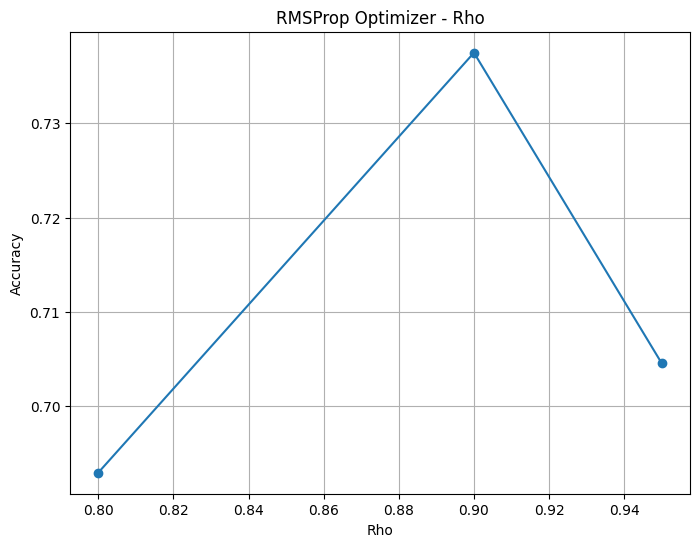

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(rhos, rmsprop_accuracies, marker='o') 
plt.title("RMSProp Optimizer - Rho")
plt.xlabel("Rho")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

<center> <h3  style="background-color:rgb(222, 254, 248);"><strong>Trying out the Adam Optimizer</strong></h3></center>

In [27]:
adam_betas = [(0.9, 0.999), (0.85, 0.99), (0.95, 0.995)]

In [28]:
adam_accuracies = []

for beta_1, beta_2 in adam_betas:
    optimizer = Adam(learning_rate=0.001, beta_1=beta_1, beta_2=beta_2)
    model = create_model(optimizer)
    early_stopping = EarlyStopping(monitor="val_loss",  patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_split=0.1, callbacks=[early_stopping], verbose=1)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    adam_accuracies.append(test_accuracy)
    print(f"Adam (beta_1={beta_1}, beta_2={beta_2}) - Accuracy: {test_accuracy:.4f}")

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2993 - loss: 1.9117 - val_accuracy: 0.4990 - val_loss: 1.4159
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5001 - loss: 1.4070 - val_accuracy: 0.5646 - val_loss: 1.2532
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5483 - loss: 1.2858 - val_accuracy: 0.5972 - val_loss: 1.1674
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5717 - loss: 1.2203 - val_accuracy: 0.6246 - val_loss: 1.1055
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5938 - loss: 1.1570 - val_accuracy: 0.6180 - val_loss: 1.1009
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6111 - loss: 1.1236 - val_accuracy: 0.6464 - val_loss: 1.0390
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6243 - loss: 1.0806 - val_accuracy: 0.6614 - val_loss: 0.9984
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6352 - loss: 1.0572 - 

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3069 - loss: 1.9047 - val_accuracy: 0.4914 - val_loss: 1.4357
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4961 - loss: 1.4180 - val_accuracy: 0.5594 - val_loss: 1.2622
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5442 - loss: 1.3069 - val_accuracy: 0.5908 - val_loss: 1.1986
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5755 - loss: 1.2165 - val_accuracy: 0.6236 - val_loss: 1.1185
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5948 - loss: 1.1725 - val_accuracy: 0.6302 - val_loss: 1.0803
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6128 - loss: 1.1186 - val_accuracy: 0.6532 - val_loss: 1.0368
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6223 - loss: 1.0890 - val_accuracy: 0.6588 - val_loss: 1.0121
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6299 - loss: 1.0696 - 

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2874 - loss: 1.9566 - val_accuracy: 0.4882 - val_loss: 1.4506
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4772 - loss: 1.4610 - val_accuracy: 0.5412 - val_loss: 1.3164
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5297 - loss: 1.3342 - val_accuracy: 0.5732 - val_loss: 1.2272
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5619 - loss: 1.2407 - val_accuracy: 0.6120 - val_loss: 1.1308
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5881 - loss: 1.1722 - val_accuracy: 0.6172 - val_loss: 1.1048
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6018 - loss: 1.1404 - val_accuracy: 0.6432 - val_loss: 1.0577
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6139 - loss: 1.1041 - val_accuracy: 0.6350 - val_loss: 1.0656
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6230 - loss: 1.0848 - 

In [29]:
results['Adam'] = adam_accuracies

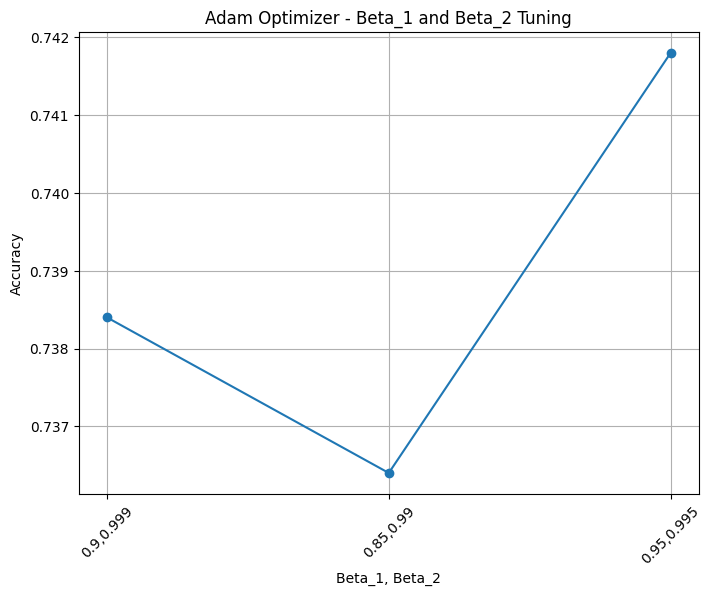

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(range(len(adam_betas)), adam_accuracies, marker='o')
plt.xticks(range(len(adam_betas)), [f"{b1},{b2}" for b1, b2 in adam_betas], rotation=45)
plt.title("Adam Optimizer - Beta_1 and Beta_2 Tuning")
plt.xlabel("Beta_1, Beta_2")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

<center> <h3  style="background-color:rgb(255, 236, 206);"><strong>Results of Optimizers</strong></h3></center>

In [31]:
print("Highest Accuracies:")
print(f"SGD: {max(sgd_accuracies):.4f} (lr={learning_rate[sgd_accuracies.index(max(sgd_accuracies))]})")
print(f"RMSProp: {max(rmsprop_accuracies):.4f} (rho={rhos[rmsprop_accuracies.index(max(rmsprop_accuracies))]})")
print(f"Adam: {max(adam_accuracies):.4f} (beta_1,beta_2={adam_betas[adam_accuracies.index(max(adam_accuracies))]})")

Highest Accuracies:
SGD: 0.7137 (lr=0.1)
RMSProp: 0.7375 (rho=0.9)
Adam: 0.7418 (beta_1,beta_2=(0.95, 0.995))


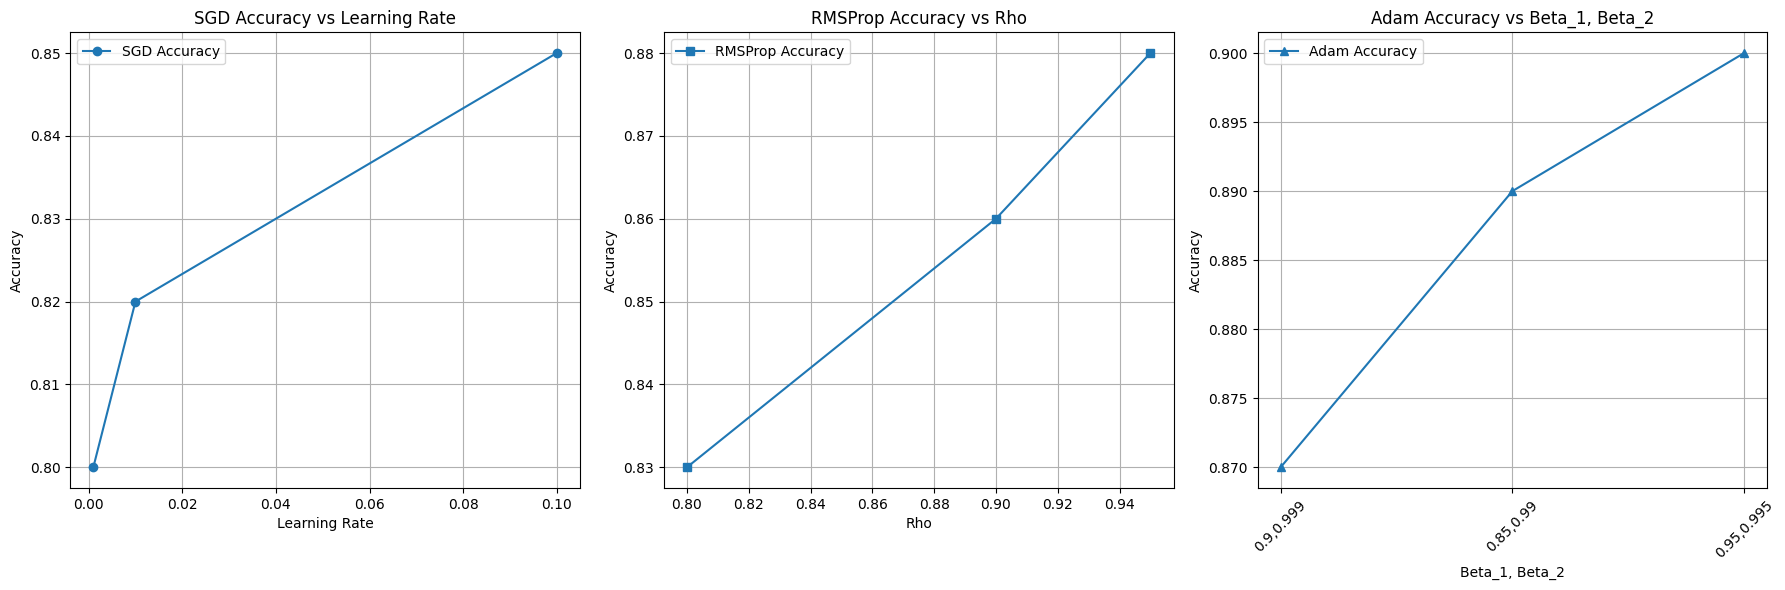

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# SGD 
axes[0].plot(learning_rate, sgd_accuracies, marker='o', linestyle='-', label="SGD Accuracy")
axes[0].set_title("SGD Accuracy vs Learning Rate")
axes[0].set_xlabel("Learning Rate")
axes[0].set_ylabel("Accuracy")
axes[0].grid()
axes[0].legend()

# RMSProp
axes[1].plot(rhos, rmsprop_accuracies, marker='s', linestyle='-', label="RMSProp Accuracy")
axes[1].set_title("RMSProp Accuracy vs Rho")
axes[1].set_xlabel("Rho")
axes[1].set_ylabel("Accuracy")
axes[1].grid()
axes[1].legend()

# Adam 
axes[2].plot(range(len(adam_betas)), adam_accuracies, marker='^', linestyle='-', label="Adam Accuracy")
axes[2].set_xticks(range(len(adam_betas)))
axes[2].set_xticklabels([f"{b1},{b2}" for b1, b2 in adam_betas], rotation=45)
axes[2].set_title("Adam Accuracy vs Beta_1, Beta_2")
axes[2].set_xlabel("Beta_1, Beta_2")
axes[2].set_ylabel("Accuracy")
axes[2].grid()
axes[2].legend()

plt.tight_layout()
plt.show()


<center> <h3  style="background-color:rgb(255, 204, 228);"><strong>Testing the GaussianNoise Regularization layer</strong></h3></center>

1. Here I'm creating a function that creates the model with the Gaussian Noise layer and tests the different stddev values.

In [39]:
def explore_gaussian_noise(stddev_values, X_train, y_train, X_test, y_test):
    accuracies = []

    for stddev in stddev_values:
        print(f"stddev={stddev}")
        
        model = keras.Sequential(
            [
                layers.Input(shape=(32, 32, 3)),
                layers.GaussianNoise(stddev=stddev),
                layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Flatten(),
                layers.Dropout(0.5),
                layers.Dense(10, activation="softmax"),
            ]
        )

        # Best optimizer with best beta_1 and beta_2
        optimizer = Adam(learning_rate=0.001, beta_1=0.95, beta_2=0.995)
        model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

        history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.1, verbose=0)

        test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
        accuracies.append(test_accuracy)
        print(f"stddev={stddev} - Test Accuracy: {test_accuracy:.4f}")


    plt.figure(figsize=(8, 6))
    plt.plot(stddev_values, accuracies, marker='o', linestyle='-', label="Accuracy")
    plt.title("Effect of GaussianNoise stddev on Accuracy")
    plt.xlabel("stddev")
    plt.ylabel("Test Accuracy")
    plt.grid()
    plt.legend()
    plt.show()

    return accuracies


2. Array of stdev values.

In [40]:
stddev_values = [0.0, 0.05, 0.1, 0.2] 

3. Using the function to test the different values.

stddev=0.0
stddev=0.0 - Test Accuracy: 0.6187
stddev=0.05
stddev=0.05 - Test Accuracy: 0.6022
stddev=0.1
stddev=0.1 - Test Accuracy: 0.5572
stddev=0.2
stddev=0.2 - Test Accuracy: 0.5431


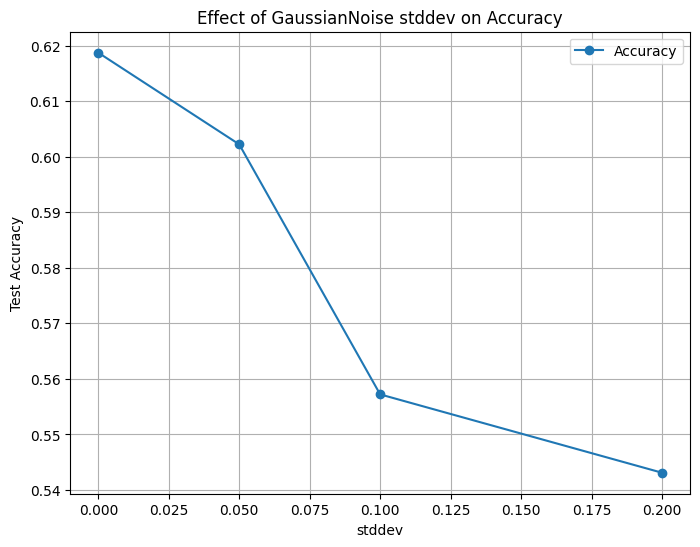

In [41]:
accuracies = explore_gaussian_noise(stddev_values, X_train, y_train, X_test, y_test)

<center> <h3  style="background-color:rgb(236, 218, 251);"><strong>Testing the Conv2D</strong></h3></center>

1. Creating the function with the Conv2D layer.

In [45]:
def explore_dilation_rate(dilation_rates, X_train, y_train, X_test, y_test):
    accuracies = []

    for dilation_rate in dilation_rates:
        print(f"Training with Conv2D dilation_rate={dilation_rate}...")

        model = keras.Sequential(
            [
                layers.Input(shape=(32, 32, 3)),
                layers.Conv2D(32, kernel_size=(3, 3), activation="relu", dilation_rate=dilation_rate),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Conv2D(64, kernel_size=(3, 3), activation="relu", dilation_rate=dilation_rate),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Flatten(),
                layers.Dropout(0.5),
                layers.Dense(10, activation="softmax"),
            ]
        )

        optimizer = Adam(learning_rate=0.001, beta_1=0.95, beta_2=0.995)
        model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

        history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.1, verbose=0)

        test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
        accuracies.append(test_accuracy)
        print(f"dilation_rate={dilation_rate} - Test Accuracy: {test_accuracy:.4f}")

    plt.figure(figsize=(8, 6))
    plt.plot(dilation_rates, accuracies, marker='o', linestyle='-', label="Accuracy")
    plt.title("Effect of Dilation Rate on Accuracy")
    plt.xlabel("Dilation Rate")
    plt.ylabel("Test Accuracy")
    plt.grid()
    plt.legend()
    plt.show()

    return accuracies

2. Devining the rates.

In [46]:
dilation_rates = [(1, 1), (2, 2), (3, 3)] 

3. Using the function.

Training with Conv2D dilation_rate=(1, 1)...
dilation_rate=(1, 1) - Test Accuracy: 0.6384
Training with Conv2D dilation_rate=(2, 2)...
dilation_rate=(2, 2) - Test Accuracy: 0.5971
Training with Conv2D dilation_rate=(3, 3)...
dilation_rate=(3, 3) - Test Accuracy: 0.5203


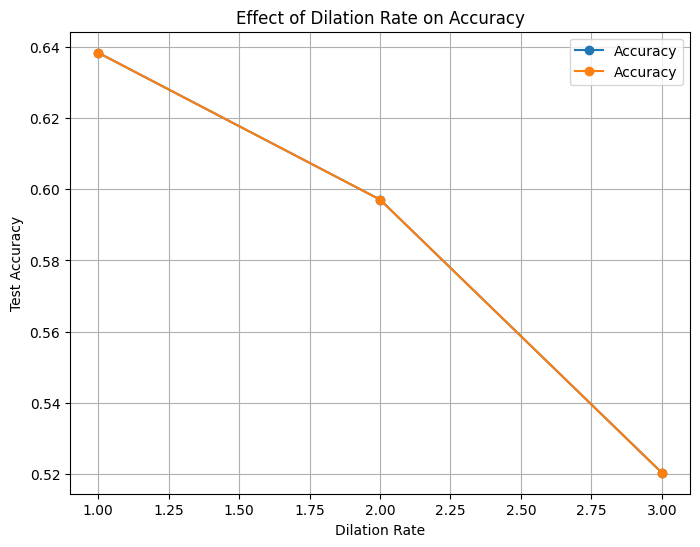

In [47]:
accuracies = explore_dilation_rate(dilation_rates, X_train, y_train, X_test, y_test)